# [COSE474] HW2 : CNN

**2022320009 이수현**

discussion and takeaway message는 각 챕터에 있습니다

## 7.1. From Fully Connected Layers to Convolutions

* 딥러닝에서의 예제 : 모델의 학습, 평가를 위해 사용되는 개별 instance 또는 관측 데이터. 보통 tensor나 숫자배열로 표현되어 딥러닝 모델에 공급


### 7.1.1. Invariance

* translation invariance (translation equivariance) : 초기 레이어에서 네트워크는 이미지의 어디에 표시되는지와 상관없이 동일한 patch에 유사하게 응답
    - 같은 물체가 이미지의 다양한 위치에 있을 때 CNN이 인식할 수 있어야함
    - CNN의 합성곱 계층과 풀링 계층으로 구현
    - 합성곱 계층은 필터를 이용해 지역적인 패턴
    - 이런 필터는 이미지 전체에 공유되어 변환 불변성을 제공
* locality principle : 네트워크의 가장 초기 계층은 먼 지역에 있는 이미지의 내용을 고려하지 않고 local에 초점을 맞춰야 한다
    - 이미지의 지역적 특징을 효과적으로 학습
* 더 깊은 레이어는 higher level vison in nature과 비슷한 방식으로 이미지의 long-range feature를 capture할 수 있어야한다.
    - deep layer에서 복잡한 패턴과 관계를 탐지. 전반적인 이미지 이해도 높이기
    - 여러층의 비선형 변환을 통해 이루어짐

### 7.1.2. Constraining the MLP

2차원 이미지 X가 input인 MLP

immediate hidden representations H는 matrices로서 두 X와 H가 같은 모양 -> 유사하게 표현

[X]i,j 및 [H]i,j는 각각 입력 이미지 및 hidden representation의 location (i,j)에 있는 픽셀을 나타냄

결과적으로 각각의 hidden units이 각 입력 픽셀로부터 입력을 받도록 하려면 가중치 행렬을 사용하는 것에서 매개변수를 4차 가중치 텐서 W(fourth-order weight tensors W)로 나타내는 것으로 전환해야 한다.

#### 7.1.2.1. Translation Invariance
translation invariance를 적용, 입력 X의 이동이 hidden layer H의 이동으로 이루어져야 함 -> 이것은 V와 U가 (i,j)에 의존하지 않는 경우에만 가능하다. => [V]i,j,a,b=[V]a,b이고 U는 상수.

=> [H]i,j = u+시그마(a)시그마(b)[V]a,b[X]i+a,j+b

: convolution!

V]a,b는 더 이상 이미지 내의 위치에 의존하지 않기 때문에 [V]i,j,a,b보다 훨씬 적은 계수가 필요. 필요한 매개변수의 수 10^12에서 4⋅10^6으로 줄었다.


#### 7.1.2.2. Locality
[H]i,j에서 무슨 일이 일어나고 있는지 평가하는데 정보를 수집하기 위해 위치 (i,j)에서 먼 범위는 볼 필요가 없다.범위 |a|>Δ 또는 |b|>Δ를 벗어나면 [V]a,b=0으로 설정해야 함.

매개변수의 수가 4⋅10^6에서 4Δ^2로 줄어듭니다. (여기서 Δ는 일반적으로 10보다 작음. ...이 부분은 4⋅10^2로 봐도 무방할듯)

=> ocnvolution layer는 locality를 기반으로 동작하는 신경망 구조. CNN은 이런 layer를 포함한 특수 신경망으로 이미지내에서 특징을 인식하는데 최적화.V는 convolution kernel, 필터 또는 단순히 학습 가능한 매개변수인 레이어의 weights라고 함.




### 7.1.3. Convolutions
하나의 함수가 flipped되고 X만큼 이동할때 f와 g사이의 중첩을 측정.

2차원 텐서의 경우 f에 대한 인덱스 (a,b)와 g에 대한 (i-a,j-b)의 해당 합계. (i+a,j+b)를 사용하는 대신 차이점을 대신 사용한다는 점.

### 7.1.4. Channels
컨볼루션 레이어는 주어진 크기의 창을 선택하고 필터 V에 따라 강도를 가중. "waldoness"가 가장 높은 곳에서 숨겨진 레이어 표현에서 최고점을 찾도록 모델 학습을 목표로 할 수 있음.

문제점1 : 이미지는 2차원이 아니라 3차원 텐서임. 3개의 축 중 처음 두개는 공간관계와 관련이 있지만 세번째는 각 픽셀 위치에 다차원 표현을 할당하는 것으로 간주할 수 있다. 따라서 X를 [X]i,j,k로 인덱싱. 컨벌루션 필터는 그에 따라 adapt. 기존의 [V]a,b가 이제는 [V]a,b,c.

문제점2 : 숨겨진 표현을 3차 텐서 H로 공식화하는 것이 좋음. 각 공강 위치에 해당하는 단일 hidden 표현이 아니라 각 공간 위치에 해당하는 hidden 표현이 필요함. hidden 표현은 쌓인 여러개의 2차원 grid의 느낌. feature map이라고도 함.
입력 X와 hidden 표현 H 둘 다에서 다중 채널을 지원하기 때문에 V에 네번째 좌표 추가. [V]a,b,c가 이제는 [V]a,b,c,d.

d는 hidden 표현의 출력 채널을 indexing. subsequent convolution layer는 3차 텐서 H를 입력으로 사용함.


### 7.1.5. Summary and Discussion

변환 불변성 : 이미지의 모든 패치가 동일한 방식으로 처리됨
지역성 : 해당 hidden representation을 계산하는데 작은 이웃 픽셀들만 사용됨.

채널을 추가함으로써 지역성 및 변환 불변성에 의해 convoultion kernel에 부과된 제한(주변 정보만을 활용, 복잡성 줄임)으로 인해 손실된 복잡성을 회복(채널을 추가함으로써 더 많은 정보와 복잡성을 활용)


### 7.1.6. exercise

3. Why might translation invariance not be a good idea after all? Give an example.

> translation invariance는 입력 데이터의 위치가 바뀌어도 모델의 출력이 동일함을 말하는 것.
>
> 예를 들어, 복잡한 그림을 인식할때, 그림 안의 물체의 경계를 제대로 인식하지 못하여 그림을 제대로 인식 못 할 수 있다.

4. Do you think that convolutional layers might also be applicable for text data? Which problems might you encounter with language?

> 텍스트를 n-gram으로 변환하여 해당 패턴을 학습시킬 수 있다. 다만, 자연어에서 단어의 순서는 의미에 큰 영향을 미치는데 CNN은 공간 위치 정보를 무시하기 때문에 제대로 된 의미를 학습하지 못할 수 있다. 또한 텍스트가 길어지면 문맥을 이해하지 못할 수 있고, 단어에 여러 의미가 있다면 그것을 캐치하지 못할 수 있다.

### discussions or takeaway messages

* 고차원 데이터 문제 : 수십억개의 매개변수가 필요해서 학습이 불가능한 작업도 CNN의 이미지 구조를 활용하여 해결
* 변환 불변성 : 위치에 관계없이 동일한 response를 해야함.
* 지역성 : 이미지의 주변 pixel만 활용
* MLP의 구조를 제한하여 convolution을 사용함으로써 매개변수의 수를 줄일 수 있다.
* 이미지의 RGB채널 외에도 다른 채널을 추가하여 복잡성을 회복할 수 있다.

## 7.2. Convolutions for Images

In [2]:
!pip install d2l

In [3]:
import torch
from torch import nn
from d2l import torch as d2l

### 7.2.1. The Cross-Correlation Operation
convolution layer는 실제로는 convolution보다는 cross-correlation이 더 정확하다. 입력 텐서와 커널 텐서를 결합하여 출력텐서를 생성

[2차원 데이터 처리]
- 입력은 3X3의 2차원 텐서
- 커널은 2X2의 커널을 사용하여 입력 텐서에 sliding window방식

[과정]
1. 커널은 입력 텐서의 왼쪽 위에서 시작, 오른쪽과 아래로 sliding
2. 커널이 특정 위치에 도달하면, 해당 위치의 입력 서브텐서와 커널 텐서를 요소별로 곱셈
3. 곱한 결과를 모두 더하여 스칼라 값을 생성
4. 그 값을 출력 텐서의 해당 위치에 할당

출력텐서크기는 입력 텐서의 크기에서 커널의 크기를 뺀 것보다 작음. 커널이 입력 텐서의 전체 영역에 맞아야만 교차 상관을 제대로 계산할 수 있기 때문.

[padding]
출력크기를 유지하려면 입력 텐서의 경계에 0으로 padding을 추가해야함. 커널이 입력의 가장자리를 넘어 slide하도록 공간이 필요하기 때문

In [4]:
def corr2d(X, K):
    """Compute 2D cross-correlation."""
    h, w = K.shape
    Y = torch.zeros((X.shape[0] - h + 1, X.shape[1] - w + 1))
    for i in range(Y.shape[0]):
        for j in range(Y.shape[1]):
            Y[i, j] = (X[i:i + h, j:j + w] * K).sum()
    return Y

In [5]:
X = torch.tensor([[0.0, 1.0, 2.0], [3.0, 4.0, 5.0], [6.0, 7.0, 8.0]])
K = torch.tensor([[0.0, 1.0], [2.0, 3.0]])
corr2d(X, K)

tensor([[19., 25.],
        [37., 43.]])

### 7.2.2. Convolutional Layers
: 입력과 커널을 교차 상관하여 출력값을 생성하고, 여기에 스칼라 바이어스를 추가하는 레이어. convolution layer의 두 가지 주요 매개변수는 "kernel"과 "bias"입니다.

[매개변수 초기화]

컨볼루션 레이어의 커널은 무작위로 초기화되며, 이는 완전 연결 레이어와 동일한 방식. 이 과정은 모델 학습의 시작점으로, 각 커널이 다양한 패턴을 학습하도록 해줌.
=> __init__

[커널크기]

h(커널 높이)Xw(커널 너비)

In [6]:
class Conv2D(nn.Module):
    def __init__(self, kernel_size):
        super().__init__()
        self.weight = nn.Parameter(torch.rand(kernel_size))
        # ㄴ : 주어진 크기로 무작위로 초기화 된 커널
        self.bias = nn.Parameter(torch.zeros(1))
        # ㄴ : 0으로 토기화 된 bias

    def forward(self, x):
        return corr2d(x, self.weight) + self.bias
        # 입력 데이터 (x)에 대해 corr2d 함수를 호출하여
        # 커널과의 교차 상관을 수행하고,
        # 바이어스를 추가하여 최종 출력을 생성합니다.

### 7.2.3. Object Edge Detection in Images
convolution layer 적용 예시 : edge detection : 픽셀 값의 변화를 찾아내기

In [7]:
X = torch.ones((6, 8)) #6X8크기의 텐서
X[:, 2:6] = 0 # 중앙 4개 열은 검정(0), 나머지는 흰색(1)
X

tensor([[1., 1., 0., 0., 0., 0., 1., 1.],
        [1., 1., 0., 0., 0., 0., 1., 1.],
        [1., 1., 0., 0., 0., 0., 1., 1.],
        [1., 1., 0., 0., 0., 0., 1., 1.],
        [1., 1., 0., 0., 0., 0., 1., 1.],
        [1., 1., 0., 0., 0., 0., 1., 1.]])

In [8]:
K = torch.tensor([[1.0, -1.0]]) #커널 구성 : 높이1, 너비2

커널은 인접한 픽셀 값이 동일하면 출력이 0이 되고, 다르면 비제로 값을 출력합니다. 수평 방향의 1차 미분을 이산적으로 근사하는 방식

In [9]:
Y = corr2d(X, K)
Y

tensor([[ 0.,  1.,  0.,  0.,  0., -1.,  0.],
        [ 0.,  1.,  0.,  0.,  0., -1.,  0.],
        [ 0.,  1.,  0.,  0.,  0., -1.,  0.],
        [ 0.,  1.,  0.,  0.,  0., -1.,  0.],
        [ 0.,  1.,  0.,  0.,  0., -1.,  0.],
        [ 0.,  1.,  0.,  0.,  0., -1.,  0.]])

결과=> 흰색에서 검정색으로의 에지에서 1을, 검정색에서 흰색으로의 에지에서 -1을 감지

In [10]:
corr2d(X.t(), K) #t로 전치

tensor([[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]])

커널K는 수평 에지를 감지하는 데 최적화 => 수직 에지에는 반응하지 않음을 확인

### 7.2.4. Learning a Kernel
위의 예시는 수동설계. 더 큰 kernel이나 여러 layer의 convolution을 고려할 때 각 필터가 수행해야 할 작업을 정확히 정하는 것을 어렵다.
=> 입력-출력 쌍만 보고 커널을 학습 할 수 있는 방법은 없을까?

In [11]:
# Construct a two-dimensional convolutional layer with 1 output channel and a
# kernel of shape (1, 2). For the sake of simplicity, we ignore the bias here
conv2d = nn.LazyConv2d(1, kernel_size=(1, 2), bias=False)
# 1개의 출력 채널과 커널 크기 (1, 2)를 가진 2차원 컨볼루션 레이어를 생성

# The two-dimensional convolutional layer uses four-dimensional input and
# output in the format of (example, channel, height, width), where the batch
# size (number of examples in the batch) and the number of channels are both 1
X = X.reshape((1, 1, 6, 8))
Y = Y.reshape((1, 1, 6, 7))
lr = 3e-2  # Learning rate

for i in range(10):
    Y_hat = conv2d(X)
    l = (Y_hat - Y) ** 2
    conv2d.zero_grad()
    l.sum().backward()
    # Update the kernel
    conv2d.weight.data[:] -= lr * conv2d.weight.grad
    if (i + 1) % 2 == 0:
        print(f'epoch {i + 1}, loss {l.sum():.3f}')

epoch 2, loss 7.290
epoch 4, loss 1.232
epoch 6, loss 0.210
epoch 8, loss 0.037
epoch 10, loss 0.007


loop :
- 예측: 현재 커널을 사용하여 입력 (X)에 대해 출력을 생성.
- 손실 계산: 예측된 출력 (Y_{\text{hat}})과 실제 출력 (Y) 간의 차이를 제곱하여 손실을 계산.

- 기울기 계산: 손실에 대한 기울기를 계산, 커널 업데이트.

- 커널 업데이트: 학습률을 곱하여 커널 가중치를 업데이트.

- 손실 출력: 에포크가 2의 배수일 경우 손실 값을 출력
    
결과 => epoch가 진행될수록 손실 값이 작아짐.

In [12]:
conv2d.weight.data.reshape((1, 2))

tensor([[ 0.9827, -0.9893]])

=> 입력-출력을 기반으로 커널을 학습 => 더 복잡한 필터도 효과적으로 학습할 수 있다!!!

### 7.2.5. Cross-Correlation and Convolution


* 교차 상관: 입력 텐서와 커널 텐서를 결합하여 출력을 생성하는 과정. 입력과 커널 간의 직접적인 곱셈과 합산을 통해 출력을 계산
* 컨볼루션: 컨볼루션은 커널을 수평 및 수직으로 뒤집은 후 교차 상관을 수행하는 과정

* 딥러닝에서 커널은 데이터로부터 학습되기 때문에, 컨볼루션 레이어가 교차 상관을 수행하든 엄밀한 컨볼루션을 수행하든 출력은 동일
.
교차 상관을 수행하여 학습된 커널 ( K )가 있다고 가정합니다. 이 커널을 뒤집으면 ( K' )가 되고, 엄밀한 컨볼루션을 수행하면 출력은 여전히 같음. 입력과 커널 간의 관계가 보존되기 때문에

### 7.2.6. Feature Map and Receptive Field

* feature map : 컨볼루션 레이어의 출력. 이후 레이어에서의 공간적 표현(너비와 높이)을 나타냄. 특징 맵은 입력 데이터에서 학습된 특성을 보여준다.
* receptive field : CNN의 특정 레이어의 요소 (x)에 대해, receptive 필드는 순전파 과정에서 (x)의 계산에 영향을 미칠 수 있는 모든 이전 레이어의 요소를 가리킨다.실제 입력 크기보다 클 수 있는데, 이는 여러 레이어를 통해 정보가 전파되기 때문이다

### 7.2.7. Summary

* cross correlation : 중첩된 for문을 통해 계산되며, 입력과 출력 채널이 여러개인 경우 채널 간의 행렬-행렬 연산이 수행됨
* 교차 상관 연산은 매우 지역적임
* 하드웨어 최적화
* convolution은 edge, blurring images, sharpening images등에 쓰임
* 필터를 수동으로 만들 필요 없이, 데이터를 통해 필터를 학습함
* feature map, receptive field -> deep networks를 구성하는데 도움이 된다

### 7.2.8.exercise

4. How do you represent a cross-correlation operation as a matrix multiplication by changing the input and kernel tensors?

> cross correlation operation은 입력 텐서와 커널 텐서를 사용하여 입력의 특정 패턴을 감지하는데 사용된다. 이 연산을 행렬곱으로 표현하려면 두 텐서의 형태를 변환해야한다.
>
>입력텐서 -> 입력 텐서를 작은 patch로 나누어 행렬 형태로 변환
>
>커널텐서 -> 2차원 행렬로 변환

### discussions or takeaway messages

* cross correlation opeartion : 입력 텐서와 커널 텐서를 결합하여 출력 텐서를 생성
* 커널의 크기 때문에 출력 텐서의 크기는 입력 텐서보다 작다
* 커널을 직접 만들 수 있지만(각 커널의 역할 지정. edge dection에서)
* 입력-출력 쌍을 이용하여 커널을 학습할 수 있으며, 데이터로부터 적합한 필터를 자동으로 학습하여 특성 공학을 대체.
* cross correlation과 엄격한 convolution의 연산 결과는 동일
* convoltion의 출력을 feature map이라고도 함
* receptive field는 특정 요소 계산에 영향을 미치는 모든 요소를 포함
* convolution의 원리가 생물학적 시각 시스템이 작용하는 방식과 유사하다는 점이 놀랍고 신기하다.
* 데이터로 커널을 학습시킬 수 있다는 얘기인데, 데이터 구성?에 따라 커널의 성능이 어떻게 달라지는지 궁금.

## 7.3. Padding and Stride
컨볼루션을 적용할 픽셀이 부족해질때 까지만 컨볼루션 커널을 이동할 수 있는데, padding과 stride convoltion을 포함하여 출력 크기를 제어할 수 있는 기술들.

In [13]:
import torch
from torch import nn

#### 7.3.1. Padding
[padding의 필요성]

문제점: 컨볼루션 레이어를 적용할 때 이미지의 경계에서 픽셀이 손실되는 문제가 발생. 특히 코너 픽셀은 거의 사용 못함.
해결책: 입력 이미지의 경계에 padding을 추가하여 이미지의 유효 크기를 증가. 일반적으로 이 여분의 픽셀 값은 0으로 설정한다.

예시: 3X3 입력에 padding을 추가하면, 입력 크기가 8X8에서 10X10으로 증가하고, 출력 크기는 8X8로 유지됩니다.

[출력 크기 계산]

총 p_h개의 행과 p_w개의 열의 padding을 추가하면, 출력 크기 = [ \text{출력 높이} = \frac{\text{입력 높이} + 2 \times p_h - \text{커널 높이}}{s} + 1 ] [ \text{출력 너비} = \frac{\text{입력 너비} + 2 \times p_w - \text{커널 너비}}{s} + 1 ]
여기서 (s)는 스트라이드(stride)입니다.

[padding의 장점]
* 입력과 출력의 높이와 너비를 동일하게 유지할 수 있음 -> 각 layer에서 출력 크기 예측에 도움
* CNN은 보통 홀수 크기의 커널을 사용하는데, 이는 상하좌우에 동일한 수의 padding을 추가할 수 있으므로 치수 유지에 유리

=> 입력과 출력의 크기를 유지하고 픽셀 손실 방지에 도움!


In [14]:
# We define a helper function to calculate convolutions. It initializes the
# convolutional layer weights and performs corresponding dimensionality
# elevations and reductions on the input and output
def comp_conv2d(conv2d, X):
    # (1, 1) indicates that batch size and the number of channels are both 1
    X = X.reshape((1, 1) + X.shape)
    Y = conv2d(X)
    # Strip the first two dimensions: examples and channels
    return Y.reshape(Y.shape[2:])

# 1 row and column is padded on either side, so a total of 2 rows or columns
# are added
conv2d = nn.LazyConv2d(1, kernel_size=3, padding=1)
X = torch.rand(size=(8, 8))
comp_conv2d(conv2d, X).shape

torch.Size([8, 8])

* conv2d = nn.LazyConv2d(1, kernel_size=3, padding=1)
    높이와 너비가 각각 3인 컨볼루션 레이어를 정의하고, 모든 면에 1픽셀의 패딩을 추가합니다.
* conv2d = nn.LazyConv2d(1, kernel_size=(5, 3), padding=(2, 1))
    커널의 높이와 너비가 다를 경우, 각 방향에 대해 다른 패딩 수치를 설정하여 입력과 출력의 크기를 동일하게 유지. => 높이 5, 너비 3인 커널을 사용할 때 상하에 2픽셀, 좌우에 1픽셀의 패딩을 추가.

In [15]:
# We use a convolution kernel with height 5 and width 3. The padding on either
# side of the height and width are 2 and 1, respectively
conv2d = nn.LazyConv2d(1, kernel_size=(5, 3), padding=(2, 1))
comp_conv2d(conv2d, X).shape

torch.Size([8, 8])

### 7.3.2. Stride
: 스트라이드는 교차 상관 연산에서 커널이 입력 텐서를 슬라이드할 때, 한 번에 이동하는 행과 열의 수를 의미.
stride=1 : 커널이 한번에 한 요소씩 이동.

[stride 장점]

스트라이드를 늘리면 계산 효율성을 높이거나 다운샘플링을 수행할 수 있음. 특히 큰 커널을 사용할 경우, 더 넓은 영역을 캡처.

[stride 적용]

스트라이드가 3인 세로 방향과 2인 가로 방향으로 설정된 경우
- 첫 번째 열의 두 번째 요소를 생성할 때 커널이 세 행 아래로 이동
- 첫 번째 행의 두 번째 요소를 생성할 때는 두 열 오른쪽으로 이동
- 스트라이드가 커지면 커널이 이동한 후에도 출력이 생성되지 않을 수 있음. 입력 요소가 커널의 크기를 채우지 못할 때 발생

[출력 크기]

stride의 height(sh), weidth(sw)
[(nh-kb+ph+sh)/sh]X[(nw-kw+pw+sw)/sw]

In [16]:
conv2d = nn.LazyConv2d(1, kernel_size=3, padding=1, stride=2)
comp_conv2d(conv2d, X).shape

torch.Size([4, 4])

In [17]:
conv2d = nn.LazyConv2d(1, kernel_size=(3, 5), padding=(0, 1), stride=(3, 4))
comp_conv2d(conv2d, X).shape

torch.Size([2, 2])

stride는 커널의 이동 방식을 조절하여 출력 크기를 효과적으로 관리할 수 있음. stride를 적절히 설정함으로써 계산량을 줄이고, 다운샘플링 효과를 얻을 수 있다.

### 7.3.3. Summary and Discussion
* padding : 입력과 출력의 높이와 너비를 동일하게 유지하기 위해 사용. 출력의 축소를 방지하여 모델의 예측을 더 일관되게 만들어준다
* stride는 출력의 해상도를 줄일 수 있다. 예를 들어, (s = 2)로 설정하면 출력의 높이와 너비는 입력의 절반이 된다
* zero padding : 지금까지 논의한 패딩은 모두 제로 패딩으로, 구현이 간단하고 계산적으로 이점이 있다. 제로 패딩은 추가 메모리 할당 없이도 쉽게 처리할 수 있음.
* 비제로 padding : 제로패딩외의 다양한 패딩이 있음.....

### 7.3.4. exercise

1. Given the final code example in this section with kernel size (3,5), padding (0,1), and stride (3,4), calculate the output shape to check if it is consistent with the experimental result.

> 커널크기 3,5 / 패딩 0,1 / stride 3,4
>
> [(nh-kb+ph+sh)/sh]X[(nw-kw+pw+sw)/sw]
>
> [(8-3+0+3)/3] = [8/3] = 2
>
> [(8-5+1+4)/4] = [8/4] = 2
>
> => 2X2 사이즈로 결과와 동일합니다

2. For audio signals, what does a stride of 2 correspond to?

> 한번의 연산 후 2개 간격으로 샘플 이동을 한다는 의미이다. 샘플링 간격이 2이므로, 출력 신호의 해상도가 감소하고 계산시간이 빨라진다



4. What are the computational benefits of a stride larger than 1?

> 커널의 이동 간격이 커지므로 계산량이 줄어든다. 또한 연산량이 줄어들기 때문에 메모리도 적게 사용한다.


5. What might be statistical benefits of a stride larger than 1?

> 훈련할때 과적합을 방지할 수 있고, 보폭이 클수록 서로 다른 입력 샘플간의 관계를 더 잘 추출해 낼 수 있다.

### discussions or takeaway messages

* padding은 입출력의 높이 너비를 동일하게 유지 -> 모델 예측의 일관성 -> 학습 굿
* stride를 적절하게 사용하면 -> 해상도 줄일 수 있음, 계산량 down
* 비제로 padding이 아티팩트 문제 해결에 도움이 된다고 하는데 아티팩트 문제가 뭔지는 찾아봐야 할 것 같음

## 7.4. Multiple Input and Multiple Output Channels
다중 입력 및 다중 출력 채널이 있는 컨볼루션 커널

### 7.4.1. Multiple Input Channels
: 다중 입력 채널

: 이미지나 다른 형태의 데이터가 여러 채널을 포함할 때, 각 입력 채널에 대해 동일한 수의 입력 채널을 가진 컨볼루션 커널을 구성해야함.

예시 : 입력데이터의 채널 수 C, 커널의 window가 hXw이면
커널의 전체는 CXhXw

교차상관연산 : 입력 채널에 대해 커널을 적용한 후, 그 결과를 모두 더하여 최종 출력 텐서를 생성. 이는 각 채널에서의 교차 상관 결과를 합산하여 2차원 텐서를 생성하는 과정을 포함.

다중 입력 채널을 처리하는 컨볼루션은 각 채널에서의 정보를 통합하여 더 풍부한 특징을 학습할 수 있게 함. 다양한 입력 데이터를 효과적으로 처리하는데 필수적



In [18]:
def corr2d_multi_in(X, K):
    # Iterate through the 0th dimension (channel) of K first, then add them up
    return sum(d2l.corr2d(x, k) for x, k in zip(X, K))

In [19]:
X = torch.tensor([[[0.0, 1.0, 2.0], [3.0, 4.0, 5.0], [6.0, 7.0, 8.0]],
               [[1.0, 2.0, 3.0], [4.0, 5.0, 6.0], [7.0, 8.0, 9.0]]])
K = torch.tensor([[[0.0, 1.0], [2.0, 3.0]], [[1.0, 2.0], [3.0, 4.0]]])

corr2d_multi_in(X, K)

tensor([[ 56.,  72.],
        [104., 120.]])

### 7.4.2. Multiple Output Channels

신경망이 더 깊어짐에 따라 실제로 채널 차원을 증가시키고 일반적으로 더 큰 채널 깊이를 위해 공간 해상도를 절충하기 위해 다운샘플링함.

각 layer에서 다중 출력 채널을 갖음으로써 네트워크의 깊이가 깊어짐에 따라 채널 차원을 확장하여 다양한 특징을 학습할 수 있게 함.

representation이 픽셀또는 채널별로 독립적으로 학습된다고 함. 채널은 공동으로 유용하도록 최적화됨.=> 단일 채널을 에지 검출기에 매핑하는 것이 아니라 단순히 채널 공간의 일부 방향이 에지 검출에 해당함을 의미

각 채널은 서로 다른 특징 세트에 반응하도록 설계되어 있으며, 이는 각 채널이 독립적으로 작동하는 것이 아니라, 서로 협력하여 더 유용한 표현을 학습하게 됨

입력채널수 Cin, 출력채널수 Cout, 커널의 높이 Kh, 커널의 너비 Kw.


최종 커널 텐서 = CoutXCinXKhXKw

다중 출력 채널은 CNN의 성능을 극대화하며, 각 채널이 서로 다른 특징을 학습하도록 함. 이를 통해 네트워크는 더 복잡한 패턴을 인식하고, 다양한 입력 데이터에 대해 효과적으로 대응할 수 있다.



In [20]:
def corr2d_multi_in_out(X, K):
    # Iterate through the 0th dimension of K, and each time, perform
    # cross-correlation operations with input X. All of the results are
    # stacked together
    return torch.stack([corr2d_multi_in(X, k) for k in K], 0)

In [21]:
K = torch.stack((K, K + 1, K + 2), 0)
K.shape

torch.Size([3, 2, 2, 2])

In [22]:
corr2d_multi_in_out(X, K)

tensor([[[ 56.,  72.],
         [104., 120.]],

        [[ 76., 100.],
         [148., 172.]],

        [[ 96., 128.],
         [192., 224.]]])

[헷갈려서 정리하는 다중입력채널 VS 다중출력채널]

* 다중입력채널
    - 립력데이터가 여러 채널로 구성(RGB같은거)
    - 모델이 다중 입력 채널을 통해 다양한 색상 및 정보에 대해 학습가능.
    - 각 입력 채널은 서로 다른 특징을 나타내며, 이들이 결합하여 최종 출력이 나옴
* 다중출력채널
    - convolution layer에서 여러개의 출력 채널을 생성하는 경우
    - 각 출력 채널은 입력 채널의 조합을 통해 생성되며 특정 특징을 학습하기 위해 설계됨
    - 다중출력채널을 통해 더 복잡한 패턴을 인식할 수 있음
    - 각 출력채널은 서로 다른 특징을 감지, 이를 통해 모델의 표현 능력을 향상
    - 예를 들어, 첫 번째 레이어에서 에지를 감지하는 채널이 있을 수 있고, 다음 레이어에서 텍스처를 감지하는 채널이 있는 경우


### 7.4.3. 1X1 Convolutional Layer

커널의 크기가 1X1인 컨볼루션을 의미. 인접한 픽셀 간의 상관 관계를 고려하지 않기 때문에 직관적으로 이해하기 어려울 수 있지만 1x1 컨볼루션은 깊은 신경망의 설계에서 매우 유용하며, 특히 채널 간의 정보를 조합하는 데 사용됨.

각 픽셀 위치에서 입력 채널의 정보를 선형 결합하여 출력 채널을 생성

[입출력방식]
* 입출력 형태 : 입출력은 동일한 높이와 너비. 각 출력 채널의 값은 입력 채널의 선형 조합으로 계산됨
* 가중치 공유 : 각 픽셀위치에서 동일한 가중치를 사용 -> 전체 네트워크의 parameter수를 줄이는데 도움이 됨.  입력채널 Cin, 출력채널 Cout일때 필요한 가중치의 수 = CinXCout

[계산]
* minimum window이 사용되기 때문에 1×1 컨볼루션은 높이와 너비 차원에서 인접한 요소 간의 상호 작용으로 구성된 패턴을 인식하는 더 큰 컨볼루션 레이어의 기능을 잃는. 1×1 컨벌루션의 유일한 계산은 채널 차원에서 발생
*  1x1 컨볼루션은 실제로는 각 채널의 값을 선형 변환하는 것 => 행렬 곱셈으로 구현
* 입력 텐서의 형태를 조정한 후, 행렬 곱셈을 수행하여 출력을 생성

In [23]:
def corr2d_multi_in_out_1x1(X, K):
    c_i, h, w = X.shape
    c_o = K.shape[0]
    X = X.reshape((c_i, h * w))
    K = K.reshape((c_o, c_i))
    # Matrix multiplication in the fully connected layer
    Y = torch.matmul(K, X)
    return Y.reshape((c_o, h, w))

In [26]:
X = torch.normal(0, 1, (3, 3, 3))
K = torch.normal(0, 1, (2, 3, 1, 1))
Y1 = corr2d_multi_in_out_1x1(X, K)
Y2 = corr2d_multi_in_out(X, K)
assert float(torch.abs(Y1 - Y2).sum()) < 1e-6

### 7.4.4. Discussion
* 채널을 통해 MLP의 비선형성 및 컨졸루션의 국지적 분석의 장점을 동시에 활용
* 채널은 CNN이 여러 특징을 동시에 고려할 수 있게 함 -> 더 표현력 있고 다양한 모델을 구축
* 입력 이미지 크기가 HXW, 커널 KXK 입력 채널 Cin, 출력채널 Cout이면
* 기본적으로 O(HXWXK^2)의 비용이 발생
* 입력과 출력 채널을 고려하면 O(HXWXK^2XCinXCout)
* 계산비용을 줄이는 효율적인 아키텍처 : ResNeXt


### 7.4.5.exercise

4. Are the variables Y1 and Y2 in the final example of this section exactly the same? Why?

> Y1은 행렬 곱셈으로, Y2는 2D convolution을 통해 계산되었다. 다른 방식으로 계산되었지만, 같은 입력과 커널을 사용했기 때문에 최종 결과가 같게 나온다.



### discussions or takeaway messages


* 다중입력채널
    - 립력데이터가 여러 채널로 구성(RGB같은거)
    - 모델이 다중 입력 채널을 통해 다양한 색상 및 정보에 대해 학습가능.
    - 각 입력 채널은 서로 다른 특징을 나타내며, 이들이 결합하여 최종 출력이 나옴
* 다중출력채널
    - convolution layer에서 여러개의 출력 채널을 생성하는 경우
    - 각 출력 채널은 입력 채널의 조합을 통해 생성되며 특정 특징을 학습하기 위해 설계됨
    - 다중출력채널을 통해 더 복잡한 패턴을 인식할 수 있음
    - 각 출력채널은 서로 다른 특징을 감지, 이를 통해 모델의 표현 능력을 향상
    - 예를 들어, 첫 번째 레이어에서 에지를 감지하는 채널이 있을 수 있고, 다음 레이어에서 텍스처를 감지하는 채널이 있는 경우

* 1X1 convolution : 각 채널에서 입력 값을 선형 결합하여 출력 값을 생성하는 방식. 이는 사실상 각 픽셀 위치에서 완전 연결층을 적용하는 것과 유사
* 파라미터 수를 줄이면서 채널 간의 상호작용을 하여 CNN의 성능을 극대화

## 7.5. Pooling
최종 레이어의 유닛은 전체 입력에 민감해야 함. 이를 위해 정보가 점차 집계되고, 점점 더 조잡한 맵을 생성함으로써 전반적인 표현을 학습할 수 있다.

네트워크의 깊이가 증가할수록 각 은닉 노드가 민감한 수용 필드의 크기도 커지고, 공간 해상도를 줄이면 이 과정을 가속화할 수 있다.

edge와 같은 저수준 특징을 감지할 때는 표현이 살짝 불변이기를 원함.

위치에 대한 convolution layer의 민감도를 완화하고 표현을 공간적으로 다운샘플링하는 역할을 하는 pooling layer에 대해서 알아본다

In [27]:
import torch
from torch import nn
from d2l import torch as d2l

### 7.5.1. Maximum Pooling and Average Pooling

[pooling layer]
* 풀링 레이어는 고정된 형태의 윈도우를 사용하여 입력의 모든 지역을 슬라이드하며 각 위치에 대해 단일 출력을 계산. 풀링 레이어는 파라미터가 없고(커널이 없음), deterministic함.
* 풀링 윈도우 내의 요소들 중 최대값이나 평균값을 계산하여 출력을 생성.

1. 평균 풀링 (Average Pooling)
    - 인접한 픽셀의 값을 평균내어 더 나은 신호 대 잡음 비율을 얻는 방식으로, 이미지를 다운샘플링하는 데 사용.
    - 데이터의 정보를 더 잘 유지할 수 있습니다.
2. 최대 풀링 (Max Pooling)
    - 지정된 풀링 윈도우 내에서 최대값을 계산하여 출력합니다.

* 두 경우 모두 pooling window를 입력 텐서의 왼쪽 위 -> 오른쪽 아래.
* pooling window가 도달하는 각 위치에서 최대 또는 평균 풀링이 사용되는지 여부에 따라 윈도우에서 입력 하위 텐서의 최대값 또는 평균값을 계산

* max pooling을 사용하면 패턴이 한 요소만큼 이동해도 여전히 감지됨 => 위치에 대한 민감도 완화


In [28]:
def pool2d(X, pool_size, mode='max'): #최대 풀링
    p_h, p_w = pool_size
    Y = torch.zeros((X.shape[0] - p_h + 1, X.shape[1] - p_w + 1))
    for i in range(Y.shape[0]):
        for j in range(Y.shape[1]):
            if mode == 'max':
                Y[i, j] = X[i: i + p_h, j: j + p_w].max()
            elif mode == 'avg':
                Y[i, j] = X[i: i + p_h, j: j + p_w].mean()
    return Y

In [29]:
X = torch.tensor([[0.0, 1.0, 2.0], [3.0, 4.0, 5.0], [6.0, 7.0, 8.0]])
pool2d(X, (2, 2))

tensor([[4., 5.],
        [7., 8.]])

In [30]:
pool2d(X, (2, 2), 'avg') #평균 풀링

tensor([[2., 3.],
        [5., 6.]])

### 7.5.2. Padding and Stride

컨벌루션 레이어와 마찬가지로 풀링 레이어는 출력 형태를 변경. 이전과 마찬가지로 입력을 패딩하고 stride을 조정하여 원하는 출력 모양을 얻을 수 있음

=> 원하는 출력 크기를 얻고, 정보의 손실을 최소화 가능. 다양한 크기의 padding, stride의 활용으로 모델의 유연성 up

In [31]:
#4차원 입력 텐서. 배치 크기와 채널 수는 각각 1입니다.
X = torch.arange(16, dtype=torch.float32).reshape((1, 1, 4, 4))
X

tensor([[[[ 0.,  1.,  2.,  3.],
          [ 4.,  5.,  6.,  7.],
          [ 8.,  9., 10., 11.],
          [12., 13., 14., 15.]]]])

In [32]:
#풀링 윈도우의 크기와 스트라이드는 기본적으로 일치
pool2d = nn.MaxPool2d(3)
# Pooling has no model parameters, hence it needs no initialization
pool2d(X)

tensor([[[[10.]]]])

In [33]:
pool2d = nn.MaxPool2d(3, padding=1, stride=2)
pool2d(X)

tensor([[[[ 5.,  7.],
          [13., 15.]]]])

In [34]:
#기본적으로 풀링 윈도우와 스트라이드의 크기가 일치하지만
#수동 조정 가능
pool2d = nn.MaxPool2d((2, 3), stride=(2, 3), padding=(0, 1))
pool2d(X)

tensor([[[[ 5.,  7.],
          [13., 15.]]]])

### 7.5.3. Multiple Channels

다중 채널 입력 데이터를 처리할 때 풀링 계층은 컨벌루션 계층에서와 같이 채널을 통해 입력을 합산하는 대신 각 입력 채널을 "개별적"으로 풀링 => 풀링 레이어의 출력 채널 수가 입력 채널 수와 같다는 것을 의미

다중 채널을 가진 입력 데이터에 대해 풀링 레이어는 각 채널을 독립적으로 처리하여 출력한다. 이것은 다양한 특징을 유지하면서도 정보의 손실을 최소화하는데 도움이 된다


In [35]:
X = torch.cat((X, X + 1), 1)
X

tensor([[[[ 0.,  1.,  2.,  3.],
          [ 4.,  5.,  6.,  7.],
          [ 8.,  9., 10., 11.],
          [12., 13., 14., 15.]],

         [[ 1.,  2.,  3.,  4.],
          [ 5.,  6.,  7.,  8.],
          [ 9., 10., 11., 12.],
          [13., 14., 15., 16.]]]])

In [36]:
pool2d = nn.MaxPool2d(3, padding=1, stride=2)
pool2d(X)

tensor([[[[ 5.,  7.],
          [13., 15.]],

         [[ 6.,  8.],
          [14., 16.]]]])

결과 : 출력 텐서는 두 개의 채널을 가지며, 각 채널에 대해 최대 풀링이 적용된 결과이다. 첫 번째 채널의 출력은 최대값을 포함하고, 두 번째 채널에서도 같은 방식으로 최대값이 계산됨

### 7.5.4. Summary

* pooling : 주어진 값의 윈도우에서 결과를 집계
* convolution : 풀링 레이어에서도 stride, padding과 같은 convolution의 의미가 동일하게 적용
* pooling은 채널 수를 변경하지 않으며, 각 채널에 독립적으로 적용됨.
* 즉, 입력 채널의 수 = 출력 채널의 수
* max pooling , average pooling
* max pooling을 더 선호. 결과불면성 측면에서 좀 더 나음
* pooling window는 보통 2X2를 선택 -> 해상도 1/4
* 해상도 줄이는 방법ㅇ : pooling, stochastic pooling,fractional max pooling 등

### 7.5.5. exercise

2. Prove that max-pooling cannot be implemented through a convolution alone.

> convolution은 가중치와 입력의 곱을 계산하여 출력을 생성한다. 그러나 max pooling은 입력 값 중에서 최댓값을 선택하는 비선형적 연산이고, 가중치를 설정하려고 해도 가중치가 입력의 크기나 패턴에 따라 변하는 것이 아니기 때문에 특정 영역에서 가중치를 이용하여 최댓값을 선택할 수 없다.

### discussions or takeaway messages

* poolling은 입력값의 윈도우에서 결과를 집계
* convolution과의 차이점은 parameter가 없고 determinstic하다는 것
* 출력에 대한 불변성으로 max pooling을 보통 더 선호
* padding, stride를 조정 -> 원하는 출력 형태
* 기본적으로 pooling window와 stride는 동일하지만 수동 조정할 수 있음
* pooling layer는 입력의 각 채널을 독립적으로 적용 => 입력 채널 수 = 출력 채널 수
* 해상도 감소의 역할

## 7.6. Convolutional Neural Networks (LeNet)

In [37]:
import torch
from torch import nn
from d2l import torch as d2l

### 7.6.1. LeNet

대략적으로 LeNet(LeNet-5)은 두 부분으로 구성.
1. 두 개의 컨볼루션 레이어로 구성된 컨볼루션 인코더,
2. 3개의 완전히 연결된 레이어로 구성된 조밀한 블록

[컨볼루션 블록]

* 각 컨볼루션 블록은 컨볼루션 레이어, 시그모이드 활성화 함수, 그리고 이후의 평균 풀링 연산으로 구성
* 첫 번째 컨볼루션 레이어는 6개의 출력 채널을 가지며, 두 번째는 16개.
* 각 풀링 연산은 차원을 절반으로 줄인다.

[밀집 블록]

* Flattening: 컨볼루션 블록의 출력을 밀집 블록에 전달하기 위해, 4차원 입력을 2차원 입력으로 변환.
* 밀집 블록은 120, 84, 10개의 출력을 가지는 세 개의 완전 연결 레이어로 구성됩니다.




In [38]:
def init_cnn(module):
    """Initialize weights for CNNs."""
    if type(module) == nn.Linear or type(module) == nn.Conv2d:
        nn.init.xavier_uniform_(module.weight) #가중치 초기화

class LeNet(d2l.Classifier):
    """The LeNet-5 model."""
    def __init__(self, lr=0.1, num_classes=10):
        super().__init__()
        self.save_hyperparameters()
        self.net = nn.Sequential( #레이어 연결
            nn.LazyConv2d(6, kernel_size=5, padding=2), nn.Sigmoid(),
            nn.AvgPool2d(kernel_size=2, stride=2),
            nn.LazyConv2d(16, kernel_size=5), nn.Sigmoid(),
            nn.AvgPool2d(kernel_size=2, stride=2),
            nn.Flatten(),
            nn.LazyLinear(120), nn.Sigmoid(),
            nn.LazyLinear(84), nn.Sigmoid(),
            nn.LazyLinear(num_classes))

In [39]:
@d2l.add_to_class(d2l.Classifier)
def layer_summary(self, X_shape):
    X = torch.randn(*X_shape)
    for layer in self.net:
        X = layer(X)
        print(layer.__class__.__name__, 'output shape:\t', X.shape)

model = LeNet()
model.layer_summary((1, 1, 28, 28))

Conv2d output shape:	 torch.Size([1, 6, 28, 28])
Sigmoid output shape:	 torch.Size([1, 6, 28, 28])
AvgPool2d output shape:	 torch.Size([1, 6, 14, 14])
Conv2d output shape:	 torch.Size([1, 16, 10, 10])
Sigmoid output shape:	 torch.Size([1, 16, 10, 10])
AvgPool2d output shape:	 torch.Size([1, 16, 5, 5])
Flatten output shape:	 torch.Size([1, 400])
Linear output shape:	 torch.Size([1, 120])
Sigmoid output shape:	 torch.Size([1, 120])
Linear output shape:	 torch.Size([1, 84])
Sigmoid output shape:	 torch.Size([1, 84])
Linear output shape:	 torch.Size([1, 10])


결과해석)
* 차원: 각 레이어에서 높이와 너비는 이전 레이어에 비해 감소하며, 첫 번째 컨볼루션 레이어는 2픽셀의 패딩을 사용하여 차원의 감소를 보완. 두 번째 컨볼루션 레이어는 패딩 없이 4픽셀 감소.
* 채널 수: 입력의 채널 수는 1에서 6, 16으로 증가, 각 풀링 레이어는 높이와 너비를 절반으로 줄인다.

결과 자세한 분석)
1. Conv2d (1, 6, 28, 28):
    - 입력 이미지의 크기: (1, 1, 28, 28) (배치 크기, 채널, 높이, 너비)
    - 첫 번째 합성곱 레이어에서 6개의 필터를 사용하여 출력이 (1, 6, 28, 28)로 유지됩니다.
    - 필터 크기: 5x5, 패딩: 2로 설정되어 있어 출력 사이즈가 입력 사이즈와 동일하게 유지됩니다.
2. Sigmoid (1, 6, 28, 28):
    - 활성화 함수로 Sigmoid를 사용하며, 출력 모양은 Conv2d 레이어와 같습니다.
3. AvgPool2d (1, 6, 14, 14):
    - 평균 풀링 레이어가 2x2 커널과 stride 2를 사용하여 출력 크기를 절반으로 줄입니다.
    - 결과적으로 출력 모양은 (1, 6, 14, 14)입니다.
4. Conv2d (1, 16, 10, 10):
    - 두 번째 합성곱 레이어에서 16개의 필터를 사용하여 출력 크기가 (1, 16, 10, 10)으로 줄어듭니다.
    - 필터 크기: 5x5, 패딩이 없으므로 높이와 너비가 각각 5씩 줄어듭니다.
5. Sigmoid (1, 16, 10, 10):
    - 활성화 함수로 Sigmoid를 적용하여 출력 모양은 Conv2d 레이어와 동일합니다.
6. AvgPool2d (1, 16, 5, 5):
    - 두 번째 풀링 레이어 역시 2x2 커널과 stride 2를 사용하여 출력 크기를 다시 절반으로 줄입니다.
    - 결과적으로 출력 모양은 (1, 16, 5, 5)입니다.
7. Flatten (1, 400):
    - 5x5 크기의 16개의 채널을 평탄화하여 1차원 벡터로 변환합니다.
출력 모양은 (1, 400)입니다.
8. Linear (1, 120):
    - 첫 번째 완전 연결 레이어로, 400개의 입력을 받아 120개의 출력을 생성합니다.
    - 출력 모양은 (1, 120)입니다.
9. Sigmoid (1, 120):
    - 활성화 함수인 Sigmoid를 적용하여 출력 모양은 Linear 레이어와 동일합니다.
10. Linear (1, 84):
    - 두 번째 완전 연결 레이어로, 120개의 입력을 받아 84개의 출력을 생성합니다.
    - 출력 모양은 (1, 84)입니다.
11. Sigmoid (1, 84):
    - Sigmoid 활성화 함수 적용 후 출력 모양은 Linear 레이어와 같습니다.
12. Linear (1, 10):
    - 마지막 완전 연결 레이어로, 84개의 입력을 받아 10개의 클래스에 대한 출력을 생성합니다.
    - 출력 모양은 (1, 10)으로, 각 클래스에 대한 예측 점수를 나타냅니다.

### 7.6.2. Training

* CNN은 MLP보다 매개변수의 수가 적지만, 각 매개변수가 더 많은 곱셈에 참여하기 때문에 계산비용은 더 비쌀 수 있음

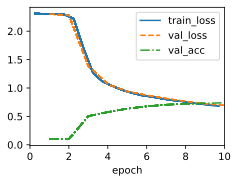

In [40]:
trainer = d2l.Trainer(max_epochs=10, num_gpus=1)
data = d2l.FashionMNIST(batch_size=128)
model = LeNet(lr=0.1)
model.apply_init([next(iter(data.get_dataloader(True)))[0]], init_cnn)
trainer.fit(model, data)

### 7.6.3. Summary

* MLP에서 CNN으로 발전함

### discussions or takeaway messages

* MLP(다층 퍼셉트론) 에서 CNN(합성곱 신경망)으로의 발전
* LeNet-5는 fashion-minist데이터셋에서 우수한 성능. MLP와 비교하면 더 낮은 오류율
* 옛날에는 LeNet을 구현하기 위해 수개월의 엔지니어링 작업이 필요했지만, 이제 현대의 딥러닝 프레임워크를 통해 몇분 안에 구현 가능해짐

### 7.6.4. exercise

1. Let’s modernize LeNet. Implement and test the following changes:

    1. Replace average pooling with max-pooling.

    2. Replace the softmax layer with ReLU.

위의 LeNet코드에서

average pooling -> max

ReLU 로 바꾸기.

그에 대한 결과는 아래의 코드와 같습니다.

In [55]:
def init_cnn(module):
    """Initialize weights for CNNs."""
    if isinstance(module, (nn.Linear, nn.Conv2d)):
        nn.init.xavier_uniform_(module.weight)

In [56]:
#sigmoid -> relu
#avg->max

class LeNet(d2l.Classifier):
    """The LeNet-5 model."""
    def __init__(self, lr=0.1, num_classes=10):
        super().__init__()
        self.save_hyperparameters()
        self.net = nn.Sequential(  # 레이어 연결
            nn.LazyConv2d(6, kernel_size=5, padding=2), nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.LazyConv2d(16, kernel_size=5), nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Flatten(),
            nn.LazyLinear(120), nn.ReLU(),
            nn.LazyLinear(84), nn.ReLU(),
            nn.LazyLinear(num_classes)
        )

In [57]:
@d2l.add_to_class(d2l.Classifier)
def layer_summary(self, X_shape):
    X = torch.randn(*X_shape)
    for layer in self.net:
        X = layer(X)
        print(layer.__class__.__name__, 'output shape:\t', X.shape)

model = LeNet()
model.layer_summary((1, 1, 28, 28))

Conv2d output shape:	 torch.Size([1, 6, 28, 28])
ReLU output shape:	 torch.Size([1, 6, 28, 28])
MaxPool2d output shape:	 torch.Size([1, 6, 14, 14])
Conv2d output shape:	 torch.Size([1, 16, 10, 10])
ReLU output shape:	 torch.Size([1, 16, 10, 10])
MaxPool2d output shape:	 torch.Size([1, 16, 5, 5])
Flatten output shape:	 torch.Size([1, 400])
Linear output shape:	 torch.Size([1, 120])
ReLU output shape:	 torch.Size([1, 120])
Linear output shape:	 torch.Size([1, 84])
ReLU output shape:	 torch.Size([1, 84])
Linear output shape:	 torch.Size([1, 10])


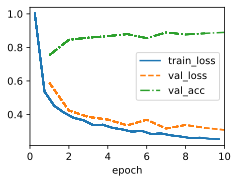

In [58]:
trainer = d2l.Trainer(max_epochs=10, num_gpus=1)
data = d2l.FashionMNIST(batch_size=128)
model = LeNet(lr=0.1)
model.apply_init([next(iter(data.get_dataloader(True)))[0]], init_cnn)
trainer.fit(model, data)

## 8.2. Networks Using Blocks (VGG)

딥 네트워크를 설계하는데 필요한 몇가지 휴리스틱 개념

[네트워크 설계]

VLSI(초대형 집적 회로) 설계의 진화와 유사. 초기에는 트랜지스터를 개별적으로 배치하는 데서 시작하여, 이후 논리 요소, 논리 블록으로 발전.

신경망 아키텍처 설계도 점점 더 추상화되어 가고 있다.
초기: 개별 뉴런에 대한 생각에서 시작.
현재: 전체 레이어와 반복되는 패턴의 블록으로 이동.
미래: 훈련된 전체 모델을 사용하여 관련된 다른 과제에 재사용하는 방향으로 발전.

[VGG]
네트워크 설계에서 블록 사용의 개념은 Visual Geometry Group에서 시작. VGG네트워크는 이러한 반복구조를 효과적으로 구현하는 방법을 제시.


In [41]:
import torch
from torch import nn
from d2l import torch as d2l

### 8.2.1. VGG Blocks

[구성요소]

* 컨볼루션 레이어: 패딩을 이용해 해상도를 유지
* 비선형성: ReLU와 같은 활성화 함수.
* 풀링 레이어: max-pooling을 통해 해상도를 줄입니다.

-> 문제점 : 공간 해상도가 너무 빠르게 감소함. ImageNet 데이터셋의 경우, 8개 이상의 컨볼루션 레이어를 사용하는 것이 불가능할수도

[해결책]

Simonyan, Zisserman :  다운샘플링(max-pooling) 사이에 여러 개의 컨볼루션을 사용하는 블록 구조를 제안. 두 개의 연속적인 컨볼루션은 단일 큰 컨볼루션과 동일한 픽셀에 적용되지만, 더 많은 매개변수를 사용하지 않고도 성능을 향상시킬 수 있다. 이로 인해 더 깊고 좁은 네트워크가 더 나은 성능을 보여줌

[VGG block]

VGG 블록은 3x3 커널을 사용, 패딩은 1로 설정하여 높이와 너비를 유지. 그 후 최대 풀링 레이어를 추가하여 높이와 너비를 1/2.

In [42]:
def vgg_block(num_convs, out_channels):
    layers = []
    for _ in range(num_convs):
        layers.append(nn.LazyConv2d(out_channels, kernel_size=3, padding=1))
        layers.append(nn.ReLU())
    layers.append(nn.MaxPool2d(kernel_size=2,stride=2))
    return nn.Sequential(*layers)

### 8.2.2. VGG Network

[VGG 네트워크]
* VGG 네트워크는 AlexNet과 LeNet과 유사하게 두 부분으로 나뉩니다:

    - 컨볼루션 및 풀링 레이어
    - 완전 연결 레이
* 차이점: VGG의 컨볼루션 레이어는 비선형 변환으로 그룹화되어 있으며,이어서 해상도 감소 단계. (AlexNet는 각 레이어가 독립적으로 설계됨)

[VGG 블록]
* VGG 블록은 여러 개의 컨볼루션을 포함하며, 각 블록은 해상도를 줄이는 최대 풀링 레이어로 끝남.
* VGG는 블록의 수, 각 블록의 컨볼루션 레이어 수 및 출력 채널 수를 포함하는 튜플의 리스트로 아키텍처를 정의.-> 이로 인해 VGG는 단일 네트워크 구현이 아닌 여러 네트워크 패밀리를 정의.

In [43]:
class VGG(d2l.Classifier):
    def __init__(self, arch, lr=0.1, num_classes=10):
        super().__init__()
        self.save_hyperparameters()
        conv_blks = []
        for (num_convs, out_channels) in arch:
            conv_blks.append(vgg_block(num_convs, out_channels))
        self.net = nn.Sequential(
            *conv_blks, nn.Flatten(),
            nn.LazyLinear(4096), nn.ReLU(), nn.Dropout(0.5),
            nn.LazyLinear(4096), nn.ReLU(), nn.Dropout(0.5),
            nn.LazyLinear(num_classes))
        self.net.apply(d2l.init_cnn)

원래 VGG 네트워크는 5개의 컨볼루션 블록을 가지고 있으며, 첫 두 블록은 각각 1개의 컨볼루션 레이어를, 나머지 세 블록은 각각 2개의 컨볼루션 레이어를 포함. 각 블록의 출력 채널 수는 64에서 시작하여 각 블록마다 두 배로 증가하여 512에 도달. 이 네트워크는 총 8개의 컨볼루션 레이어와 3개의 완전 연결 레이어를 포함하고 있어 VGG-11라고 함.

결과) 각 블록을 통과하면서 높이, 너비가 절반으로 줄어 7X7의 형태. flatten 레이터를 통해 1차원벡터로 변환되어 완전 연결 레이어로 입력됨

In [44]:
VGG(arch=((1, 64), (1, 128), (2, 256), (2, 512), (2, 512))).layer_summary(
    (1, 1, 224, 224))

Sequential output shape:	 torch.Size([1, 64, 112, 112])
Sequential output shape:	 torch.Size([1, 128, 56, 56])
Sequential output shape:	 torch.Size([1, 256, 28, 28])
Sequential output shape:	 torch.Size([1, 512, 14, 14])
Sequential output shape:	 torch.Size([1, 512, 7, 7])
Flatten output shape:	 torch.Size([1, 25088])
Linear output shape:	 torch.Size([1, 4096])
ReLU output shape:	 torch.Size([1, 4096])
Dropout output shape:	 torch.Size([1, 4096])
Linear output shape:	 torch.Size([1, 4096])
ReLU output shape:	 torch.Size([1, 4096])
Dropout output shape:	 torch.Size([1, 4096])
Linear output shape:	 torch.Size([1, 10])


### 8.2.3. Training

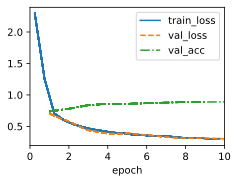

In [45]:
model = VGG(arch=((1, 16), (1, 32), (2, 64), (2, 128), (2, 128)), lr=0.01)
trainer = d2l.Trainer(max_epochs=10, num_gpus=1)
data = d2l.FashionMNIST(batch_size=128, resize=(224, 224))
model.apply_init([next(iter(data.get_dataloader(True)))[0]], d2l.init_cnn)
trainer.fit(model, data)

### 8.2.4. Summary

* VGG는 현대 CNN의 시작이라고 할 정도로 중요함. 여러개의 컨볼루션 블록과 깊고 좁은 네트워크에 대한 선호의 특성을 도입
* VGG는 단일 네트워크가 아닌 유사한 매개변수를 가진 여러 모델의 가족을 정의
* 현대의 딥러닝 프레임워크는 네트워크를 XML 구성 파일로 정의할 필요 없이 간단한 Python 코드로 조립할 수 있게 해줘서 개발 과정이 단순화됨

### 8.2.5 exercises

2. When displaying the dimensions associated with the various layers of the network, we only see the information associated with eight blocks (plus some auxiliary transforms), even though the network has 11 layers. Where did the remaining three layers go?

> VGG네트워크는 여러개의 convolution layer와 max pooling레이어로 구성. 나머지 3개의 layer는 완전 연결 레이어로, 최종 예측을 위해 사용된다. 차원 정보는 컨볼루션과 풀링 레이어에 중점을 두기 때문에, 완전 연결 레이어는 생략되고 두개만 표시된 것이라고 볼 수 있다. 즉, 나머지 3개의 레이어는 완전 연결 레이어.

### discussions or takeaway messages

* VGG 네트워크 구성
    - 컨볼루션 및 풀링 레이어 : 여러 VGG블록으로 구성
    - 완전 연결 레이어

* VGG 블록 : 다양한 아키텍처를 정의할 수 있는 패밀리를 형성, 특정 네트워크는 블록을 조합하여 구성됨
* 현대 딥러닝 프레임워크의 발전으로 개발 과정이 단순화됨


## 8.6. Residual Networks (ResNet) and ResNeXt

In [46]:
import torch
from torch import nn
from torch.nn import functional as F
from d2l import torch as d2l

### 8.6.1. Function Classes

특정 네트워크 아키텍처가 도달할 수 있는 함수 클래스를 고려. 주어진 데이터셋을 통해 학습하여 얻을 수 잇는 파라미터 집합을 포함함

* 최적화 문제
    - 데이터셋의 특징 ( x )와 레이블 ( y )를 가지고 ( f )를 찾기 위해 최적화 문제를 해결하려고 합니다.
    - 정규화는 함수 클래스의 복잡성을 제어하고 일관성을 달성하는 데 도움을 줄 수 있음. 훈련 데이터의 크기가 커질수록 일반적으로 더 나은 hat{f}을 기대할 수 있습니다.

* 함수 클래스

* nested 함수 클래스
    - 함수클래스 F'이 F를 포함하는 경우, 네트워크의 표현력이 증가한다고 보잘할 수 있음 -> 더 많은 계층을 추가할 때 기존 모델과 동일한 성능을 유지 가능

* ResNet (잔차 네트워크)
    - deep CV model을 연구할때, 추가된 각 계층이 정체 함수를 포함해야 한다
    - 잔차 블록

* 잔차 블록의 적용
    - 순환 신경망, transformer 모델, 그래프 신경망 등 다양한 네트워크 구조에 추가되어 효율적으로 많은 계층을 쌓는 데 사용

### 8.6.2. Residual Blocks

[잔차 블록]

*  입력을 X로 하고, 우리가 학습하고자 하는 목표 맵핑을 H로 가정. 잔차 블록의 왼쪽 부분은 H를 직접 학습해야 하며, 오른쪽 부분은 잔차 맵핑 R을 학습.
* 아이덴티티 맵핑: 만약 우리가 원하는 목표 맵핑이 아이덴티티 맵핑 I라면, 잔차 맵핑은 'R = H - I'. 학습이 더 쉬워지며, 상위 레이어의 가중치와 편향을 0으로 설정하는거로 충분함.


[잔차 연결]

* 잔차 블록의 구조에서 입력 X는 추가 연산을 거치지 않고 직접 더해져, 최종 ReLU 활성화 함수 전에 더해지는데 이것으로 잔차 연결이 이루어짐
* 잔차 연결을 통해 입력이 레이어를 빠르게 전파

[ResNet 설계]

* VGG의 구조 채택: ResNet은 VGG의 모든 컨볼루션 레이어 설계를 포함하며, 각 잔차 블록은 두 개의 동일한 출력 채널을 가진 3x3 컨볼루션 레이어로 구성.
* 각 컨볼루션 레이어 뒤에는 배치 정규화와 ReLU 활성화 함수가 있다. 이 두 개의 컨볼루션 연산 뒤에는 입력을 더하기 전에 추가적인 변환을 통해 출력 형태를 맞출 필요가 잇다.

In [47]:
class Residual(nn.Module):
    """The Residual block of ResNet models."""
    def __init__(self, num_channels, use_1x1conv=False, strides=1):
        super().__init__()
        self.conv1 = nn.LazyConv2d(num_channels, kernel_size=3, padding=1,
                                   stride=strides)
        self.conv2 = nn.LazyConv2d(num_channels, kernel_size=3, padding=1)
        if use_1x1conv:
            self.conv3 = nn.LazyConv2d(num_channels, kernel_size=1,
                                       stride=strides)
        else:
            self.conv3 = None
        self.bn1 = nn.LazyBatchNorm2d()
        self.bn2 = nn.LazyBatchNorm2d()

    def forward(self, X):
        Y = F.relu(self.bn1(self.conv1(X)))
        Y = self.bn2(self.conv2(Y))
        if self.conv3:
            X = self.conv3(X)
        Y += X
        return F.relu(Y)

In [48]:
blk = Residual(3)
X = torch.randn(4, 3, 6, 6)
blk(X).shape

torch.Size([4, 3, 6, 6])

In [49]:
blk = Residual(6, use_1x1conv=True, strides=2)
blk(X).shape

torch.Size([4, 6, 3, 3])

### 8.6.3. ResNet Model

* 초기 : 64개의 출력 채널, 7x7 컨볼루션 레이어, stride 2. 이어 stride 2의 max-pooling 레이어. 각 컨볼루션 레이어 뒤에 배치 정규화 레이어


In [50]:
class ResNet(d2l.Classifier):
    def b1(self):
        return nn.Sequential(
            nn.LazyConv2d(64, kernel_size=7, stride=2, padding=3),
            nn.LazyBatchNorm2d(), nn.ReLU(),
            nn.MaxPool2d(kernel_size=3, stride=2, padding=1))

In [51]:
@d2l.add_to_class(ResNet)
def block(self, num_residuals, num_channels, first_block=False):
    blk = []
    for i in range(num_residuals):
        if i == 0 and not first_block:
            blk.append(Residual(num_channels, use_1x1conv=True, strides=2))
        else:
            blk.append(Residual(num_channels))
    return nn.Sequential(*blk)

모든 모듈이 ResNet에 추가. 각각의 모듈은 두 개의 잔차 블록을 사용하며, 마지막에 global average pooling 레이어와 완전 연결 레이어가 추가됨

In [52]:
@d2l.add_to_class(ResNet)
def __init__(self, arch, lr=0.1, num_classes=10):
    super(ResNet, self).__init__()
    self.save_hyperparameters()
    self.net = nn.Sequential(self.b1())
    for i, b in enumerate(arch):
        self.net.add_module(f'b{i+2}', self.block(*b, first_block=(i==0)))
    self.net.add_module('last', nn.Sequential(
        nn.AdaptiveAvgPool2d((1, 1)), nn.Flatten(),
        nn.LazyLinear(num_classes)))
    self.net.apply(d2l.init_cnn)

각 모듈에 네 개의 컨볼루션 레이어, 첫 번째 컨볼루션 레이어와 최종 완전 연결 레이어를 포함하면 총 18개의 레이어로 구성되어 있는 ResNet-18

In [53]:
class ResNet18(ResNet):
    def __init__(self, lr=0.1, num_classes=10):
        super().__init__(((2, 64), (2, 128), (2, 256), (2, 512)),
                       lr, num_classes)

ResNet18().layer_summary((1, 1, 96, 96))

Sequential output shape:	 torch.Size([1, 64, 24, 24])
Sequential output shape:	 torch.Size([1, 64, 24, 24])
Sequential output shape:	 torch.Size([1, 128, 12, 12])
Sequential output shape:	 torch.Size([1, 256, 6, 6])
Sequential output shape:	 torch.Size([1, 512, 3, 3])
Sequential output shape:	 torch.Size([1, 10])


### 8.6.4. Training

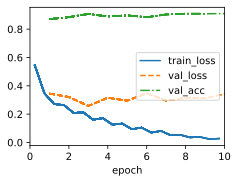

In [54]:
model = ResNet18(lr=0.01)
trainer = d2l.Trainer(max_epochs=10, num_gpus=1)
data = d2l.FashionMNIST(batch_size=128, resize=(96, 96))
model.apply_init([next(iter(data.get_dataloader(True)))[0]], d2l.init_cnn)
trainer.fit(model, data)

### discussions or takeaway messages

* ResNet의 입력 : 64개의 출력 채널을 가진 7X7 convolution - 배치 정규화, 이어지는 layer와 max poolling layer
* ResNet은 여러 개의 잔차 블록으로 이루어진 네 개의 모듈을 사용
* 각 모듈 내에서 채널 수는 첫 번째 블록을 제외하고 X2,, 높이와 너비는 1/2.
* 잔차 블록 : 2개의 3X3 컨볼루션 레이어로 구성. 입력을 더하는 잔차 연결
* ResNet의 모듈들을 통과하면서 해상도는 감소하고 채널 수는 증가